In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
os.getcwd()

'C:\\Users\\Alec\\Documents\\Programming Resources\\Boot Camp\\05_Matplotlib\\matplotlib-challenge'

In [2]:
mouse_metadata = 'resources/mouse_metadata.csv'
study_results = 'resources/study_results.csv'

## Preview Data Mouse Metadata -----------------------------------

In [3]:
mouse_metadata_df = pd.read_csv(mouse_metadata)
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
mouse_metadata_df.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [5]:
mouse_metadata_df.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [6]:
# Check Mouse Number
mouse_count = len(mouse_metadata_df['Mouse ID'].unique())
mouse_count

249

## Preview Study Data --------------------------------------------

In [7]:
study_results_df = pd.read_csv(study_results)
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
study_results_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [9]:
study_results_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

# Merge Dataframes -----------------------------------------

In [10]:
combined_df = pd.merge(mouse_metadata_df, study_results_df, how='outer', on=['Mouse ID'])

In [11]:
combined_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [12]:
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [13]:
combined_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


### Who has Duplicate Values? Are there NaN Values?

In [14]:
# use .duplicated to preserve data on duplicates instead of just dropping them
who_has_dupes = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_data = who_has_dupes

# capture only unique data, turn into list for filtering later
duplicate_mouse_list = who_has_dupes['Mouse ID'].unique()
duplicate_mouse_list

# Compare counts to OG counts above (1893)
# dupe_test_combined_df = combined_df.drop_duplicates()
# dupe_test_combined_df.count()

# NaN_test_df = combined_df.dropna(how='any')
# NaN_test_df.count()

array(['g989'], dtype=object)

## Drop Duplicate Values

In [15]:
#drop all dataframe entries matching Duplicate Mouse List
# use .isin to return values in a given list, the '~' acts as a NOT operator
# new_df = old_df['NOT'old_df['column'].isin(list)]
# ==> Return all values in data frame that are not in this list
clean_df = combined_df[~combined_df['Mouse ID'].isin(duplicate_mouse_list)]
clean_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [16]:
clean_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


# Search for a Mouse --------------------------------------

In [17]:
# Search for a mouse based on ID

# mouse_id = input('Enter Mouse ID, then press SHFT+ENTR. ')
# find_mouse = combined_df.loc[combined_df['Mouse ID'] == str.lower(mouse_id)]
# find_mouse

# --------------- Clean Data Frame Below --------------------------

# mouse_id = input('Enter Mouse ID, then press ENTER. ')
# find_mouse = clean_df.loc[clean_df['Mouse ID'] == str.lower(mouse_id).strip()]
# find_mouse

# --------------------------------------------------------------------

## Post-cleaning Mouse Count

In [18]:
# check number of mice in clean dataframe
mouse_count_new = len(clean_df['Mouse ID'].unique())
print(f"The original number of Mouse ID's was {mouse_count}. After cleaning, the number is {mouse_count_new}. ")

The original number of Mouse ID's was 249. After cleaning, the number is 248. 


In [19]:
# this is to assist with some copy/paste action of column names
column_list = clean_df.columns.to_list()

In [20]:
 # Generate a summary statistics table of mean, median, variance, standard deviation,
    #and SEM of the tumor volume for each regimen

tVol_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tVol_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tVol_variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tVol_std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tVol_SEM = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.

tVol_dReg_df = pd.DataFrame({
    'Mean Tumor Vol mm3': tVol_mean,
    'Median Tumor Vol mm3': tVol_median,
    'Variance of Tumor Vol mm3': tVol_variance,
    'Std. Dev. Tumor Vol mm3': tVol_std,
    'Std. Err. Tumor Vol mm3': tVol_SEM,
})

# format to three signifcant figures

tVol_dReg_df['Mean Tumor Vol mm3'] = tVol_dReg_df['Mean Tumor Vol mm3'].map('{:,.3f}'.format)
tVol_dReg_df['Median Tumor Vol mm3'] = tVol_dReg_df['Median Tumor Vol mm3'].map('{:,.3f}'.format)
tVol_dReg_df['Variance of Tumor Vol mm3'] = tVol_dReg_df['Variance of Tumor Vol mm3'].map('{:,.3f}'.format)
tVol_dReg_df['Std. Dev. Tumor Vol mm3'] = tVol_dReg_df['Std. Dev. Tumor Vol mm3'].map('{:,.3f}'.format)
tVol_dReg_df['Std. Err. Tumor Vol mm3'] = tVol_dReg_df['Std. Err. Tumor Vol mm3'].map('{:,.3f}'.format)

summary_stats_df = tVol_dReg_df
summary_stats_df

,Mean Tumor Vol mm3,Median Tumor Vol mm3,Variance of Tumor Vol mm3,Std. Dev. Tumor Vol mm3,Std. Err. Tumor Vol mm3
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [21]:
# pass arguments across columns in .agg() by using a dict to specify the columns and then a list of operations
aggregated_df = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
aggregated_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts ------------------------------------------------

### Bar Chart - Matplotlib

In [22]:
# obtain values
test_per_drug = clean_df['Drug Regimen'].value_counts()
# isolate Labels by taking the index values and moving to list

drug_list = clean_df['Drug Regimen'].value_counts().index.to_list()
# drug_list

# isolate the number of mice tested per drug by moving the counts of each drug to list
mice_tested = clean_df['Drug Regimen'].value_counts().to_list()
# mice_tested

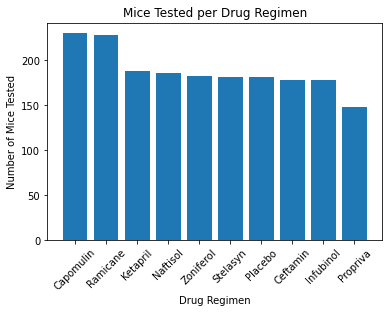

In [23]:
# Plot
plt.bar(drug_list, mice_tested)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=45)
plt.ylabel('Number of Mice Tested')
plt.title('Mice Tested per Drug Regimen')
plt.show()

### Bar Chart - Pandas

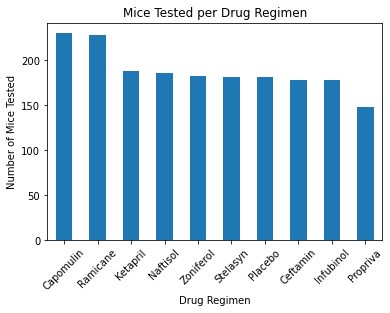

In [24]:
test_per_drug.plot(kind='bar')
plt.title('Mice Tested per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=45)
plt.show()

### Pie Chart - Matplotlib

In [25]:
# isolate values
gender_values = clean_df['Sex'].value_counts()
# move numbers to list
gender_counts = clean_df['Sex'].value_counts().to_list()
# move index labels to list
gender_labels = clean_df['Sex'].value_counts().index.to_list()
# tabulate a total for no reason
gender_total = sum(gender_counts)
# double check [1,2] = [1,2clean_df]
print(f"{gender_counts}---{gender_labels}")

[958, 922]---['Male', 'Female']


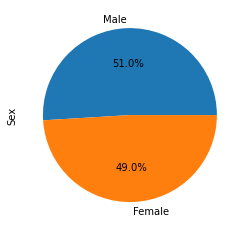

In [26]:
#plt.pie(gender_counts, labels = gender_labels, pctdistance=0.75, labeldistance=0.1 ,startangle=90, autopct = '%1.1f%%')
# the better pie chart lies above  ^

# plot the chart
plt.pie(gender_counts, labels = gender_labels, autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.show()

### Pie Chart - Pandas

<AxesSubplot:ylabel='Sex'>

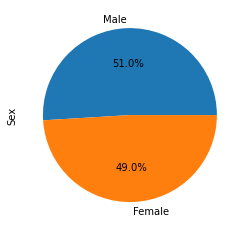

In [27]:
gender_values.plot(kind='pie', autopct = '%1.1f%%')

# Quartiles, Outliers and Boxplots

In [28]:
 # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

# reset_index to convert to dataframe without using pd.DataFrame then mucking about with
# reorganizing data
final_timepoint = final_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# left merge to keep rows in the left dataframe: new_df = left_df.merge(right_df, on=['series'], how=left)
# merge on the mouse ID and Timepoint to keep only the data with final timepoint b/c left merge
complete_df = final_timepoint.merge(clean_df, on=['Mouse ID','Timepoint'], how='left')
complete_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


## Quartiles and Outliers

In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tVol_list = []
outliers_list = []

for drug in treatment_list:
    # each time a drug in the list is equal to a drug & mouse ID, record the value in series Tumor Vol
    final_tVol = complete_df.loc[complete_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # add found value to tumor_vol_list
    tVol_list.append(final_tVol)
    
    # Determine outliers using upper and lower bounds

    # .quantile requires sorted list - perform basic IQR calculations
    quartiles = final_tVol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # this compares the running final Tumor Volume against each Bound and adds true values to list
    outliers = (final_tVol.loc[(final_tVol<lower_bound) | (final_tVol>upper_bound)])
    outliers_list.append(outliers)
print(f" The only potential outlier is {treatment_list[2]}: {outliers_list[2]}")

 The only potential outlier is Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


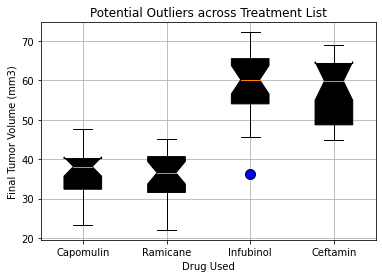

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tVol_list, notch=True, patch_artist=True, labels=treatment_list,
           boxprops=dict(facecolor='k', color='k'),
           capprops=dict(color='k'),
           whiskerprops=dict(color='k'),
           flierprops=dict(markerfacecolor='b', markersize=10))
plt.title('Potential Outliers across Treatment List')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Used')
# color time

plt.rcParams['axes.axisbelow'] = True
plt.grid()



plt.show()

# Line and Scatter Plots

### Line Graph

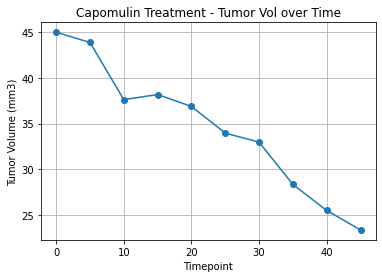

In [31]:
# gather data

capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 's185']
# set values for x & y
s185_tvol = mouse_data['Tumor Volume (mm3)']
s185_timepoint = mouse_data['Timepoint']
# plot the line
plt.plot(s185_timepoint,s185_tvol, marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment - Tumor Vol over Time')
plt.rcParams['axes.axisbelow'] = True
plt.grid()
plt.show()

### Scatter Plot

In [32]:
# obtain values

# take the average of the table and set variables equal to what you need
capomulin_averages = capomulin_data.groupby('Mouse ID').mean()
avg_tVol = capomulin_averages['Tumor Volume (mm3)']
avg_weight = capomulin_averages['Weight (g)']

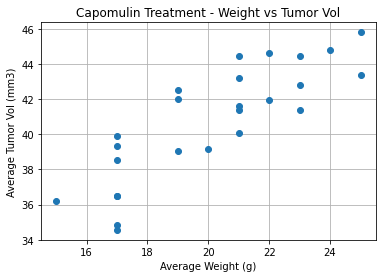

In [33]:
# plot the data
plt.scatter(avg_weight, avg_tVol)
plt.ylabel('Average Tumor Vol (mm3)')
plt.xlabel('Average Weight (g)')
plt.title('Capomulin Treatment - Weight vs Tumor Vol')
plt.rcParams['axes.axisbelow'] = True
plt.grid()

plt.show()

# Correlation and Regression

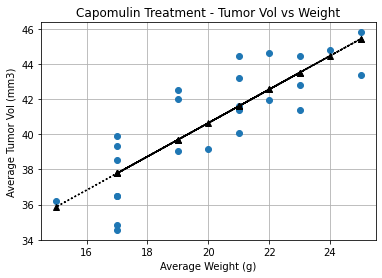

In [34]:
# display scatter chart

plt.scatter(avg_weight, avg_tVol)
plt.ylabel('Average Tumor Vol (mm3)')
plt.xlabel('Average Weight (g)')
plt.title('Capomulin Treatment - Tumor Vol vs Weight')

# Calculate the values for linear regression
avg_slope, avg_int, avg_r, avg_p, avg_std_err = st.linregress(avg_weight, avg_tVol)

avg_fit = avg_slope * avg_weight + avg_int

# plot line of best fit
plt.plot(avg_weight, avg_fit, ':^k')
plt.rcParams['axes.axisbelow'] = True
plt.grid()
plt.show()

# Capomulin & Ramicane

#### Assemble Data

In [85]:
capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_averages = capomulin_data.groupby('Mouse ID').mean()
avg_fit = avg_slope * avg_weight + avg_int
avg_tVol_capomulin = capomulin_averages['Tumor Volume (mm3)']
avg_weight_capomulin = capomulin_averages['Weight (g)']
# plt.plot(avg_weight, avg_fit, ':^k')
# plt.scatter(avg_weight_capomulin, avg_tVol_capomulin)
# plt.ylabel('Average Tumor Vol (mm3)')
# plt.xlabel('Average Weight (g)')
# plt.title('Capomulin Treatment - Weight vs Tumor Vol')
# plt.rcParams['axes.axisbelow'] = True
# plt.grid()

# --------------------------------------------------------------------------- #

ramicane_data = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane']
ramicane_averages = ramicane_data.groupby('Mouse ID').mean()
ramicane_slope, ramicane_int, ramicane_r, ramicane_p, ramicane_std_err = st.linregress(avg_weight_ramicane, avg_tVol_ramicane)
ramicane_fit = ramicane_slope * avg_weight_ramicane + ramicane_int
# plt.plot(avg_weight_ramicane, ramicane_fit, ':^g')
# avg_tVol_ramicane = ramicane_averages['Tumor Volume (mm3)']
# avg_weight_ramicane = ramicane_averages['Weight (g)']
# plt.scatter(avg_weight_ramicane, avg_tVol_ramicane)
# plt.ylabel('Average Tumor Vol (mm3)')
# plt.xlabel('Average Weight (g)')
# plt.title('Ramicane Treatment - Weight vs Tumor Vol')
# plt.rcParams['axes.axisbelow'] = True
# plt.grid()
# plt.show()




### Construct Multifigure Graph

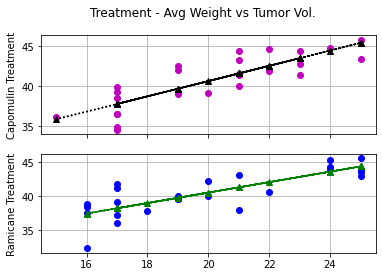

In [83]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Treatment - Avg Weight vs Tumor Vol.')
ax1.scatter(avg_weight_capomulin, avg_tVol_capomulin, color='m')
ax1.plot(avg_weight, avg_fit, ':^k')
ax1.set_ylabel("Capomulin Treatment")
ax1.grid()

ax2.scatter(avg_weight_ramicane, avg_tVol_ramicane, color='b')
ax2.set_ylabel('Ramicane Treatment')
ax2.plot(avg_weight_ramicane, ramicane_fit, ':^g')
ax2.grid()

# Graph Drug Data - Average Weight vs Average Tumor Vol

['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva']
What drug averages would you like to see plotted? Ramicane


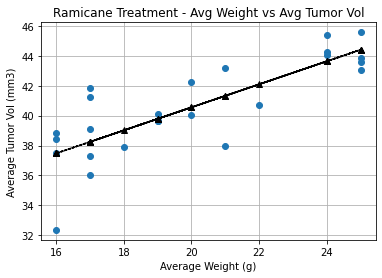

In [56]:
# let the users see the options and spelling
print(drug_list)

treatment_drug = input("What drug averages would you like to see plotted? ")
treatment_drug = str.title(treatment_drug).strip()

# set variables
drug_data = clean_df.loc[clean_df['Drug Regimen'] == (treatment_drug).strip()]
drug_averages = drug_data.groupby('Mouse ID').mean()
avg_tVol_drug = drug_averages['Tumor Volume (mm3)']
avg_weight_drug = drug_averages['Weight (g)']
plt.scatter(avg_weight_drug, avg_tVol_drug)
plt.ylabel('Average Tumor Vol (mm3)')
plt.xlabel('Average Weight (g)')
plt.title(f'{treatment_drug} Treatment - Avg Weight vs Avg Tumor Vol')

# Calculate the values for linear regression
drug_slope,drug_int, drug_r, drug_p, drug_std_err = st.linregress(avg_weight_drug, avg_tVol_drug)

drug_fit = drug_slope * avg_weight_drug + drug_int

# plot line of best fit
plt.plot(avg_weight_drug, drug_fit, ':^k')

# keep this below all line arguments
plt.rcParams['axes.axisbelow'] = True
plt.grid()

#plt.show()

plt.savefig(f'resources\\visualizations\\{treatment_drug} Treatment_weight_v_tVol.png')
